# Common Univariate Random Variables

There are named random variable distributions in excess of 200. Each of these are developed and named to express real world data based obsertations in order to enable description of the randomness observed regarding the behaviour. This chapter focuses on the named random variables that are commonly utilized in the Financial space.

Risk Managers model uncertainty in many shapes and forms both with discrete and continous random variables.

**The key discrete random variables are:**

**- The "Bernoulli" - Which was touched uppon in CH2**

A general purpouse distribution that is typically used to model binary events, like defaults.

**- The Binomial**

Describes the sum of $n$ independent Bernoulli random variables. 

**- And the Poisson**

Commonly used to model Hazard Rates, which is the count of the number of events that occur in a fixed unit of time / observartions. For example think about the number of corporations that default in a quarter.


There is a wider variety of continous distibutions used by risk managers to model uncertainty persay. 

**- The most basic is a uniform distribution, which serves as a foundation for all random variables.**

**- The most widely used distribution is the well known Gaussean / Normal distribution, which is usually utilized for modelling returns, and for statistical tests**

**- Many other build uppon the Gaussean with slights twists like Student's t, the Chi - Square, and the F, which can be encountered in case of evaluation of statistical models**

## Discrete Random Variables

### Bernoulli 

Been toroughly touched uppon in CH2. 

### Binomial

A binomial random variable measures the total number of successes from $n$ independent Bernoully random variables, where each has a probability of success equal to $p$. In other words, binomial distributions are used to model counts of independent events.

A binomial distribution has 2 parameters:

1. $n$, the number of independent events, and
2. $p$, the probability of each experiment that's successful

If $n$ variables $X_i$ ~ $Bernoulli(p)$ are indepentent, then a binomial with parameters $n$ and $p$ is defined as $$
Y = \sum_{i=1}^n X_i,
$$
$\text{where } Y \sim \text{Binomial}(n, p)$, or $B(n, p)$.


In [8]:
import random
def Bernoulli(p):
    """Simulate a Bernoulli trial with success probability p."""
    return 1 if random.random() < p else 0

    

def B(n, p):
    """Simulate a Binomial random variable as the sum of n independent Bernoulli trials."""
    Y = 0
    for _ in range(n):
        Y += Bernoulli(p)   # Sum of n Bernoulli(p) variables
    return Y
p: float  = 0.4             # Probability of successful experiment: 40%
n: float  = 100             # Trials
count:int = B(n, p)         # Of succesful experiments
print(f"Utilizing random's random.() method after {n} INDEPENDENT experiment with")
print(f"an individual success probability of {p*100}% we got {count} successful experiments")

Utilizing random's random.() method after 100 INDEPENDENT experiment with
an individual success probability of 40.0% we got 47 successful experiments


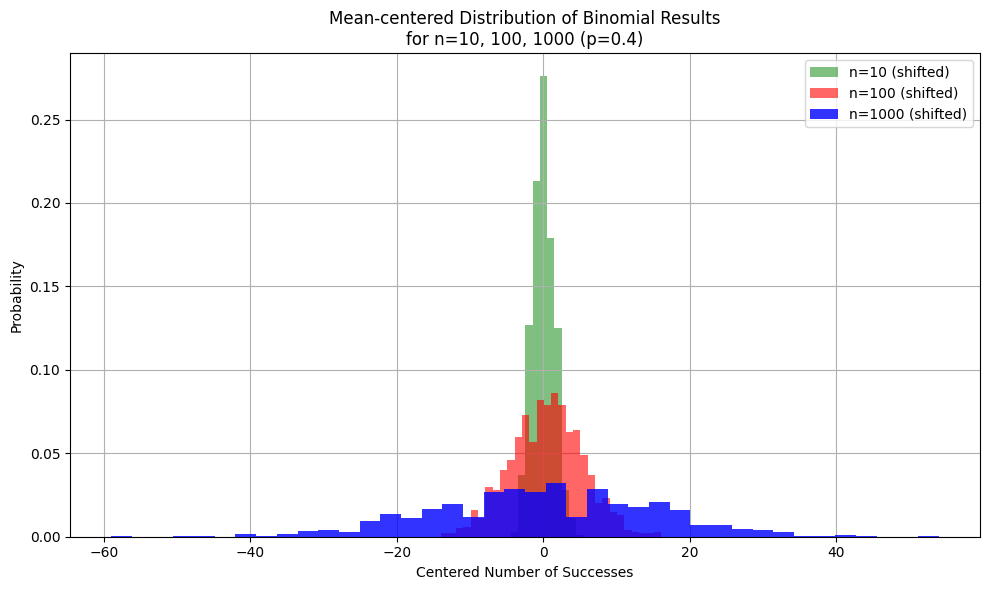

In [9]:
# Ok let's play with this! 
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
n_1 = 10
n_2 = 100
n_3 = 1000
simulations = 1000

# Simulate results
n_1_results = [B(n_1, p) for _ in range(simulations)]
n_2_results = [B(n_2, p) for _ in range(simulations)]
n_3_results = [B(n_3, p) for _ in range(simulations)]

# Mean-center ("shift") so that all three distributions peak at zero
n_1_results_shifted = [x - np.mean(n_1_results) for x in n_1_results]
n_2_results_shifted = [x - np.mean(n_2_results) for x in n_2_results]
n_3_results_shifted = [x - np.mean(n_3_results) for x in n_3_results]

# Plotting
plt.figure(figsize=(10,6))

# Plot green at back
plt.hist(n_1_results_shifted, bins=np.arange(min(n_1_results_shifted), max(n_1_results_shifted)+2)-0.5,
         alpha=0.5, color='green', density=True, label=f'n={n_1} (shifted)', zorder=1)

# Plot red in middle
plt.hist(n_2_results_shifted, bins=30,
         alpha=0.6, color='red', density=True, label=f'n={n_2} (shifted)', zorder=2)

# Plot blue on top
plt.hist(n_3_results_shifted, bins=40,
         alpha=0.8, color='blue', density=True, label=f'n={n_3} (shifted)', zorder=3)

plt.xlabel('Centered Number of Successes')
plt.ylabel('Probability')
plt.title('Mean-centered Distribution of Binomial Results\nfor n=10, 100, 1000 (p=0.4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import skew, kurtosis
import numpy as np

def descriptive_stats(data, label):
    mean_val = np.mean(data)
    var_val = np.var(data)
    skew_val = skew(data)
    kurt_val = kurtosis(data)  # Returns excess kurtosis
    print(f"{label} statistics:")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  Variance: {var_val:.4f}")
    print(f"  Skewness: {skew_val:.4f}")
    print(f"  Excess Kurtosis: {kurt_val:.4f}\n")

descriptive_stats(n_1_results, "p=0.4 n=10 results")
descriptive_stats(n_2_results, "p=0.4 n=100 results")
descriptive_stats(n_3_results, "p=0.4 n=1000 results")


p=0.4 n=10 results statistics:
  Mean: 3.9720
  Variance: 2.2332
  Skewness: 0.1593
  Excess Kurtosis: -0.2035

p=0.4 n=100 results statistics:
  Mean: 39.9250
  Variance: 24.3394
  Skewness: 0.0307
  Excess Kurtosis: -0.0553

p=0.4 n=1000 results statistics:
  Mean: 399.9970
  Variance: 233.3430
  Skewness: -0.0802
  Excess Kurtosis: 0.2088

